In [5]:
# Data ko samajhna, structure aur target variable identify karna (Loan_Status)

import pandas as pd

df = pd.read_csv(r"C:\Users\PMLS\Downloads\loan_data.csv")
print(df.head())



  Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    L001    Male     Yes           0      Graduate            No   
1    L002  Female      No           1  Not Graduate           Yes   
2    L003    Male     Yes           0      Graduate            No   
3    L004    Male     Yes           2      Graduate            No   
4    L005  Female      No           0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5000                  0         150               360   
1             3000               1500         100               360   
2             4000               1800         120               360   
3             6000                  0         200               360   
4             2500               1200          80               180   

   Credit_History Property_Area Loan_Status  
0               1         Urban           Y  
1               0         Rural           N  
2               1   

In [6]:
#Missing values handle karna, categorical ko numeric mein convert karna.
# Missing values check
print(df.isnull().sum())

# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

# Convert categorical to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']:
    df[col] = le.fit_transform(df[col])


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_15200\521525643.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_15200\521525643.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

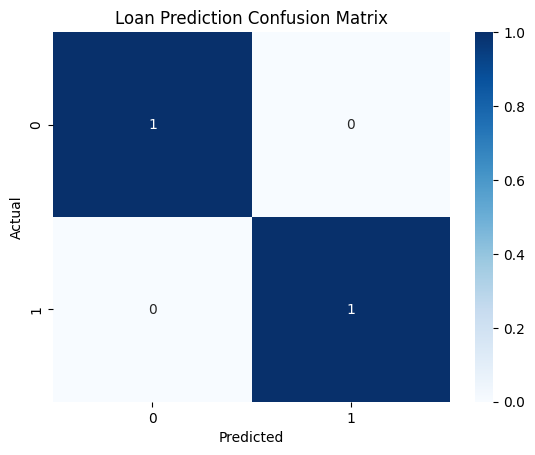

In [18]:
#Results ko graphs ke zariye samajhna.
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Loan Prediction Confusion Matrix")
plt.show()


In [16]:
# Features aur target define karo
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1, errors='ignore')  # Features
y = df['Loan_Status']  # Target

# Data ko train/test mein split karo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model train aur predict
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Random Forest model train aur predict
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

In [10]:
#Machine Learning algorithms use karke Loan Status predict karna.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']:
    df[col] = le.fit_transform(df[col])



In [8]:
#Data ko training aur testing mein divide karna.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
#Decide karna ke model ko kaunse features dene hain aur target kya hoga.
# 'Loan_ID' ko hata dein agar wo X mein hai
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1, errors='ignore')  # Features
y = df['Loan_Status']  # Target
